In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

 

In [94]:
data = pd.read_csv('data/kc_house_data.csv', index_col = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [77]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1970.999676,68.758207,47.560093,-122.213982,1986.620318,12758.283512,6.573969
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,29.375234,364.037499,0.138552,0.140724,685.230472,27274.441950,3.115061
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000


In [103]:
data = data[data.sqft_basement != '?']
data['sqft_basement'] = data['sqft_basement'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21143 non-null  object 
 1   price          21143 non-null  float64
 2   bedrooms       21143 non-null  int64  
 3   bathrooms      21143 non-null  float64
 4   sqft_living    21143 non-null  int64  
 5   sqft_lot       21143 non-null  int64  
 6   floors         21143 non-null  float64
 7   waterfront     18804 non-null  float64
 8   view           21082 non-null  float64
 9   condition      21143 non-null  int64  
 10  grade          21143 non-null  int64  
 11  sqft_above     21143 non-null  int64  
 12  sqft_basement  21143 non-null  float64
 13  yr_built       21143 non-null  int64  
 14  yr_renovated   17389 non-null  float64
 15  zipcode        21143 non-null  int64  
 16  lat            21143 non-null  float64
 17  long           21143 non-null  float

In [105]:
data['sqft_basement'] >= 0


id
7129300520    True
6414100192    True
5631500400    True
2487200875    True
1954400510    True
              ... 
263000018     True
6600060120    True
1523300141    True
291310100     True
1523300157    True
Name: sqft_basement, Length: 21143, dtype: bool

In [91]:
grouped = data.groupby(['sqft_living'])['price'].mean()
grouped

sqft_living
370       276000.0
380       245000.0
390       245000.0
410       325000.0
420       254525.0
           ...    
9640     4670000.0
9890     6890000.0
10040    7060000.0
12050    7700000.0
13540    2280000.0
Name: price, Length: 1034, dtype: float64

In [87]:
data['sqft_lot15'].quantile(.9)


17822.000000000007

In [4]:
data['yr_renovated'] = data['yr_renovated'].fillna(0)

In [19]:
data.drop(['waterfront', 'view', 'sqft_above', 'zipcode'],axis=1,inplace=True)

In [20]:
data['date'] = pd.to_datetime(data['date'])

In [21]:
grouped = data.groupby(['sqft_living', 'bedrooms'])['price'].mean()
grouped

sqft_living  bedrooms
370          1            276000.0
380          1            245000.0
390          1            245000.0
410          1            325000.0
420          1            254525.0
                           ...    
9640         5           4670000.0
9890         6           6890000.0
10040        5           7060000.0
12050        6           7700000.0
13540        7           2280000.0
Name: price, Length: 2244, dtype: float64

In [22]:
grouped = data.groupby(['sqft_living'])['bedrooms'].mean()
grouped

sqft_living
370      1.0
380      1.0
390      1.0
410      1.0
420      1.0
        ... 
9640     5.0
9890     6.0
10040    5.0
12050    6.0
13540    7.0
Name: bedrooms, Length: 1034, dtype: float64

In [23]:
data['month'] = data['date'].dt.month

In [24]:
data['date']

id
7129300520   2014-10-13
6414100192   2014-12-09
5631500400   2015-02-25
2487200875   2014-12-09
1954400510   2015-02-18
                ...    
263000018    2014-05-21
6600060120   2015-02-23
1523300141   2014-06-23
291310100    2015-01-16
1523300157   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [25]:
# data['season'] = data['month'].map(lambda x: x%12 // 3 + 1 for x in data['month'])
data = data.assign(season=lambda x: x["date"].apply(lambda s: ["winter","spring","summer","fall"][(s.month-1)//3]))
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,season
id,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,0.0,1955,0.0,47.5112,-122.257,1340,5650,10,fall
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,400.0,1951,1991.0,47.7210,-122.319,1690,7639,12,fall
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,0.0,1933,0.0,47.7379,-122.233,2720,8062,2,winter
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,910.0,1965,0.0,47.5208,-122.393,1360,5000,12,fall
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,0.0,1987,0.0,47.6168,-122.045,1800,7503,2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,3,8,0.0,2009,0.0,47.6993,-122.346,1530,1509,5,spring
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,3,8,0.0,2014,0.0,47.5107,-122.362,1830,7200,2,winter
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,3,7,0.0,2009,0.0,47.5944,-122.299,1020,2007,6,spring


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   condition      21597 non-null  int64         
 8   grade          21597 non-null  int64         
 9   sqft_basement  21597 non-null  object        
 10  yr_built       21597 non-null  int64         
 11  yr_renovated   21597 non-null  float64       
 12  lat            21597 non-null  float64       
 13  long           21597 non-null  float64       
 14  sqft_living15  21597 non-null  int64         
 15  sqft_

In [34]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month',
       'season'],
      dtype='object')

In [27]:
y = data['price']
X = data.drop(['price'], axis=1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns


<AxesSubplot:>

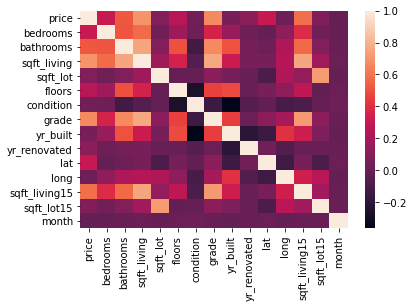

In [31]:
data.corr()
sns.heatmap(data.corr())

In [61]:
price_corrs = data.corr()["sqft_living15"].map(abs).sort_values(ascending=False)
price_corrs

sqft_living15    1.000000
sqft_living      0.756402
grade            0.713867
price            0.585241
bathrooms        0.569884
bedrooms         0.393406
long             0.335626
yr_built         0.326377
floors           0.280102
sqft_lot15       0.183515
sqft_lot         0.144763
condition        0.093072
lat              0.048679
month            0.002513
yr_renovated     0.000683
Name: sqft_living15, dtype: float64

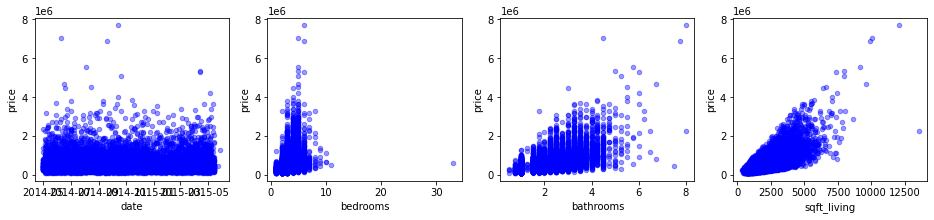

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['date', 'bedrooms', 'bathrooms', 'sqft_living'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


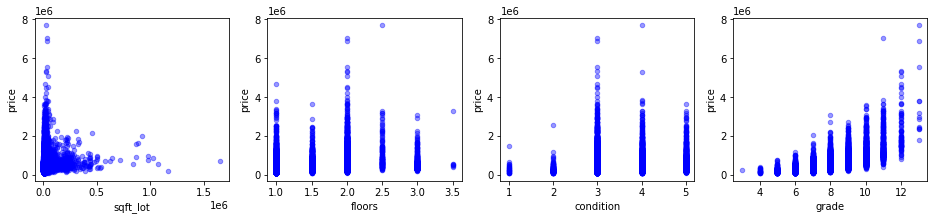

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_lot', 'floors', 'condition', 'grade'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

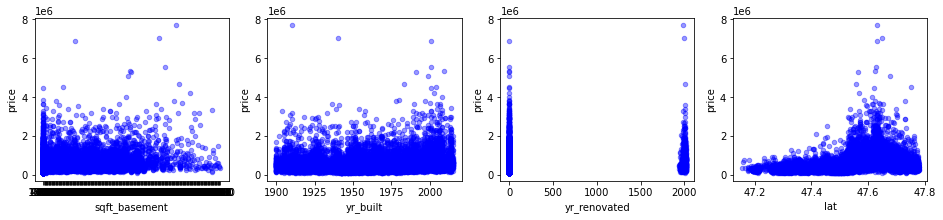

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_basement', 'yr_built', 'yr_renovated', 'lat'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

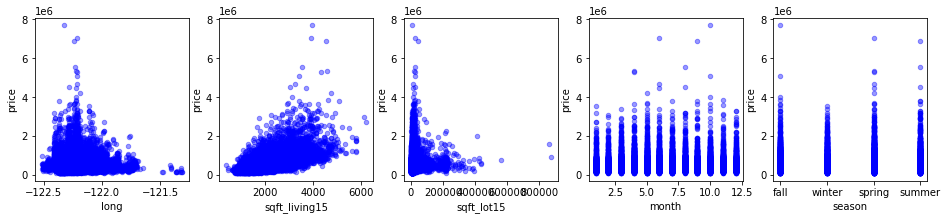

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip([ 'long', 'sqft_living15', 'sqft_lot15', 'month', 'season'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

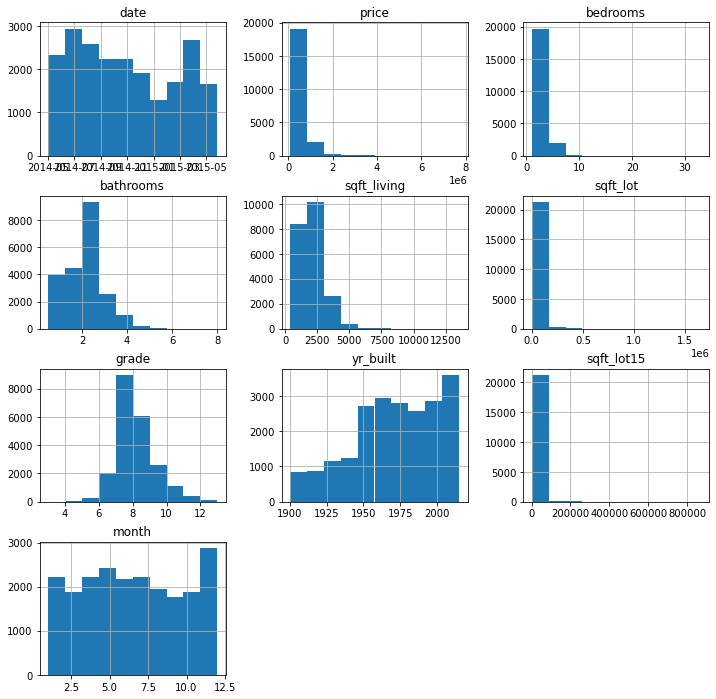

In [76]:
data_corr = data.drop(['long', 'lat', 'yr_renovated','sqft_living15', 'condition','floors'], axis=1)
hist = data_corr.hist(figsize = (12,12))
hist

In [ ]:
#DATA CLEANING
#exploratory analysis between variables (i.e. relationships, decided what to immediately drop) 
#deal with outliers
#check correlations for further column elimination (>.7)
#check normality
#check homoskedasity

#PREPROCESSING
#split categorical from continuous variables
#perform transformation on continuous
#perform OHE on categorical

#BUILD MODEL
# finalize regression

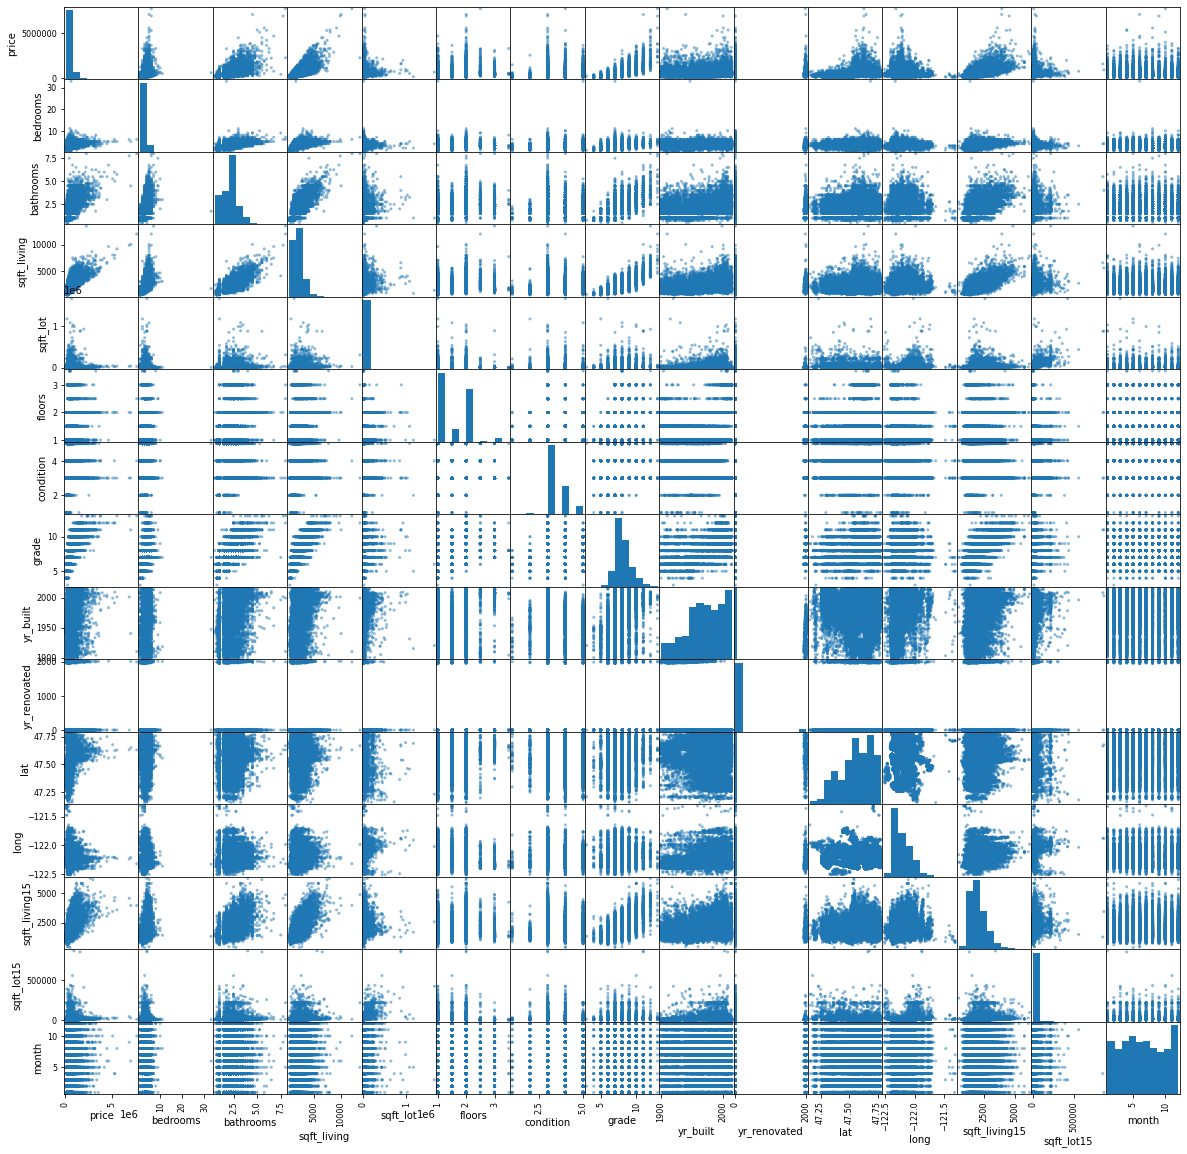

In [59]:
pd.plotting.scatter_matrix(data,figsize  = [20, 20]);
plt.show()
# keep sqft_living over sqft_living15

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
origin_dummies = lb.fit_transform(cat_origin)
# You need to convert this back to a dataframe
origin_dum_df = pd.DataFrame(origin_dummies,columns=lb.classes_)
origin_dum_df